# **Basic problem solution**

In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# global parameters
rng = np.random.default_rng(12345)

### **Generate random graph**

In [3]:
# local parameters
nnodes = 10
nedges = 12

In [4]:
# Checks 
assert nedges <= (nnodes - 1) * nnodes / 2    # nedges > max possible nedges in the full graph

In [5]:
G = nx.gnm_random_graph(nnodes, nedges)

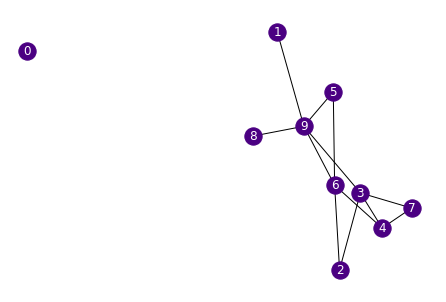

In [6]:
nx.draw(
    G, 
    with_labels=True, 
    node_color="indigo",
    font_color="w",
)

In [7]:
# Betweenness centrality
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.009259259259259259,
 3: 0.2222222222222222,
 4: 0.05092592592592592,
 5: 0.0,
 6: 0.16666666666666666,
 7: 0.0,
 8: 0.0,
 9: 0.41203703703703703}

In [8]:
# Adjacency matrix
nx.to_pandas_adjacency(G, dtype=int)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,1,0,0,1,0,1
4,0,0,0,1,0,0,1,1,0,0
5,0,0,0,0,0,0,1,0,0,1
6,0,0,1,0,1,1,0,0,0,1
7,0,0,0,1,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1
9,0,1,0,1,0,1,1,0,1,0


### **Read graph from file**

In [9]:
df = pd.read_csv("../Data/example_adjacency_matrix.csv", header=None)
H = nx.from_pandas_adjacency(df)

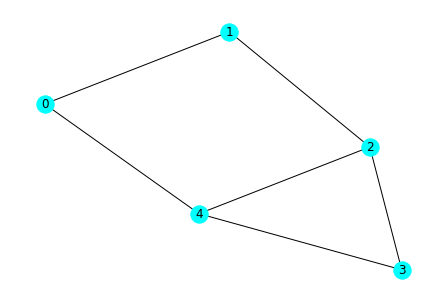

In [10]:
nx.draw(
    H, 
    with_labels=True, 
    node_color="cyan",
    font_color="k",
)

In [11]:
# Betweenness centrality 
nx.betweenness_centrality(H)

{0: 0.08333333333333333, 1: 0.08333333333333333, 2: 0.25, 3: 0.0, 4: 0.25}

In [12]:
# Adjacency matrix
nx.to_pandas_adjacency(H, dtype=int)

,0,1,2,3,4
0,0,1,0,0,1
1,1,0,1,0,0
2,0,1,0,1,1
3,0,0,1,0,1
4,1,0,1,1,0


### **Apply mutations to the graph**

In [13]:
prob = 0.1  # mutation probability
n = len(H.nodes)
ad_mat = nx.to_numpy_array(H, dtype=int)
mask = np.tril(rng.choice([0, 1], (n, n), p=[1 - prob, prob]), k=-1)
mask += mask.T
new_ad_mat = ad_mat ^ mask
Q = nx.from_numpy_array(new_ad_mat)
nx.is_isomorphic(H, Q)

False

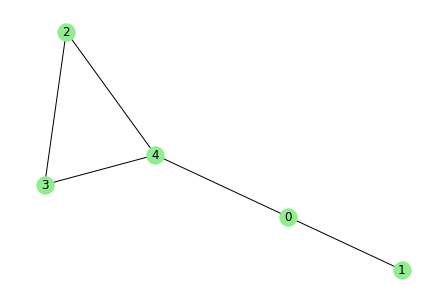

In [14]:
nx.draw(
    Q,
    with_labels=True,
    node_color="lightgreen",
    font_color="k",
)